# Project: NoShow Appointments Dataset Analysis

## 1. Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## 2. Introduction

In this project we will be analyzing the No-Show Appointments dataset. The dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments. A number of characteristics about the patient are included in each row and we need to find out the factors that are important in predicting whether a patient shows-up for the appointment or not. We seek answers to the following questions:

- Which gender is more committed to showing up for their appointments?
- Are older people more likely to miss/attend their appointments?
- Does scholarship (social welfare membership status) affect patient no-show?
- Are handicapped patients more likey to miss their appointments?
- Are there more no-show on certain days of the week?
- If a patient recevies a reminder SMS, is she/he more likely to attend the apointment?
- Does alochol problems affect patient attendance of their appointments? 
- Do patients with chronic diseases (diabetes and hypertension) tend to miss appointments more or less than other patients?
- Which neighbourhoods have higher no-show proportions? and which have the lowest?


In [1]:
# import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

<a id='wrangling'></a>
## 3. Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### 3.1. Load the dataset and check its general properties

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#print dimensions of the dataset
df.shape

(110527, 14)

In [4]:
df.info() #how many null values do we have, if any?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.dtypes #check the data types of the columns

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### The dataset has 110527 rows and 14 columns. The dataset does not contain null values. That is good. However, it looks like the two date fields are stored as strings so they will need to be transformed to datetime data type. Also, it is better to transform the No-show column to 1 and 0 instead of Yes and No for easier analysis and aggregation. All other fields look to have proper data types.

### 3.2. Assess the dataset

In [6]:
# check for duplicate rows
sum(df.duplicated())

0

In [7]:
df.isnull().sum() # any null values?

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.isna().sum() #any NaN values?

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
# Check summary statistics for each attribute
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# Check for incorrect / illogical values of Age
df[df['Age'] == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [11]:
# Check for negative values of Age
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### There are no duplicates, null values or NaN so we will not need to do any related cleaning. However there are 3539 rows with zero values for Age and one single row with a negative value for Age

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### 3.3. Data Cleaning
#### In this section we perform the necessary data cleaning steps and perform any required data tranformation so that the dataset is ready for EDA.

In [12]:
# Convert dates to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [13]:
# Create Day of week column.
import datetime
df['AppointmentDayOfWeek'] = df['AppointmentDay'].apply(lambda x: x.weekday())
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDayOfWeek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [14]:
# Rename columns to lowercase and insert _ to separate words
df.rename(columns = {'PatientId': 'patient_id',
                    'AppointmentID': 'appointment_id',
                    'Gender': 'gender',
                    'ScheduledDay': 'scheduled_day',
                    'AppointmentDay': 'appointment_day',
                    'Age': 'age',
                    'Neighbourhood': 'neighbourhood',
                    'Scholarship': 'scholarship',
                    'Hipertension': 'hipertension',
                    'Diabetes': 'diabetes',
                    'Alcoholism': 'alcoholism',
                    'Handcap': 'handcap',
                    'SMS_received': 'sms_received',
                    'No-show': 'no_show',
                    'AppointmentDayOfWeek': 'appointment_day_of_week'}, inplace=True)

In [15]:
# drop PatientId and AppointmentID columns as we will not need them for our analysis
#df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [16]:
#Convert No_show column to 1 and 0 for easier analysis
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

In [17]:
#Convert handcap column to 1,0 for better analysis
#df['handcap'] = df['handcap'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [18]:
# Create a column for the number of days between scheduling the appoointment and the appointment date
df['lead_days'] = df['appointment_day'].apply(lambda x: x.date) - df['scheduled_day'].apply(lambda x: x.date)
df['lead_days'] = df['lead_days'].apply(lambda x: x.days)

In [19]:
# Drop rows where Age is less than or equal zero
df.drop(df[df.age <= 0].index, inplace=True)

In [20]:
df.head() #display some rows from cleaned dataset

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_day_of_week,lead_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,0


<a id='eda'></a>
## 4. Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 4.1. General Exploration

In [21]:
#create masks for easier retrival of needed rows according to No-Show status
noshow = df['no_show'] == 1
showed = df['no_show'] == 0

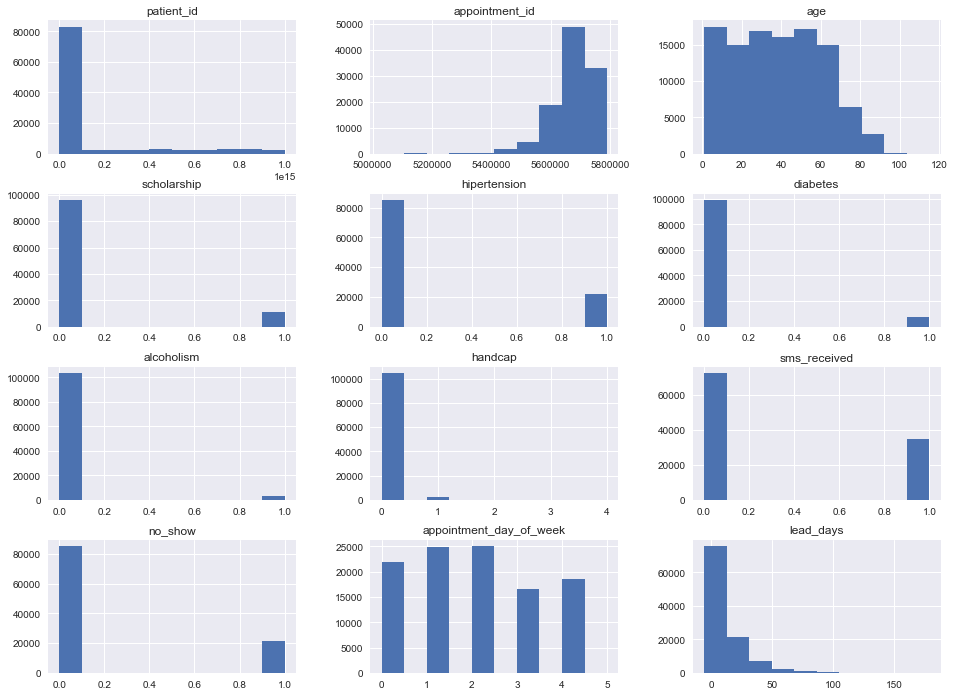

In [22]:
# Show distribution of attributes to get familiar with the data
df.hist(figsize=(16, 12));

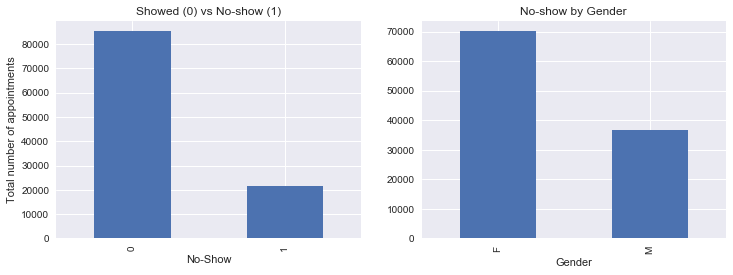

In [23]:
# check distribution of Gender and No-Show columns
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df['no_show'].value_counts().plot(kind='bar', ax=ax[0], xlabel='No-Show')
ax[0].set_title("Showed (0) vs No-show (1)")
ax[0].set_ylabel("Total number of appointments")
df['gender'].value_counts().plot(kind='bar', ax=ax[1], xlabel='Gender');
ax[1].set_title("No-show by Gender");

### 4.2. Which gender is more committed to showing up for their appointments?

In [24]:
group_counts = df.groupby('gender').no_show.value_counts()
group_counts

gender  no_show
F       0          55843
        1          14275
M       0          29464
        1           7405
Name: no_show, dtype: int64

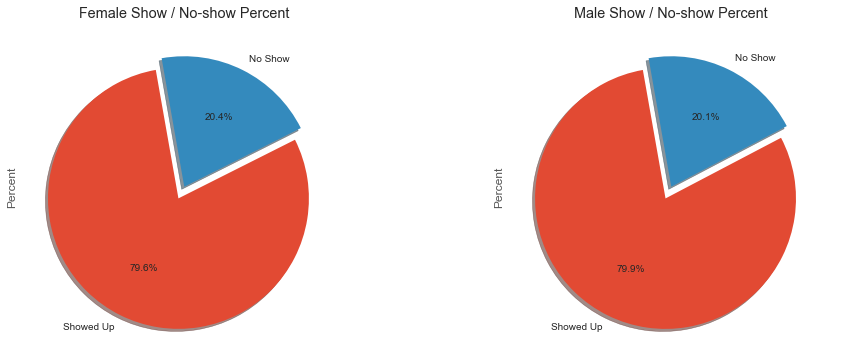

In [25]:
# Check no-show by gender
#print(plt.style.available)
plt.style.use('ggplot')
labels = ['Showed Up', 'No Show']

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
group_counts['F'].plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=100, explode=(0.1, 0), 
                    labels=labels, title = 'Female Show / No-show Percent', ylabel='Percent', ax=ax[0]);
group_counts['M'].plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=100, explode=(0.1, 0), 
                    labels=labels, title = 'Male Show / No-show Percent', ylabel='Percent', ax=ax[1]);

#### From the pie charts above we can see that the proportion of males not showing for their appointments is almost equal to the proportion of females, so we can conclude tentatively that Gender alone is not a factor that determines no-show status.

### 4.3. Are older people more likely to miss/attend their appointments?

#### Calculate the average age of both groups of patients (show and no-show)

In [26]:
df.age[noshow].mean()

35.329151291512915

In [27]:
df.age[showed].mean()

39.07518726482

#### The means of those of showed up and those who did not show up are not that different. However, the mean for those who did not show up is lower. Lets examine this further by creating histograms of both groups

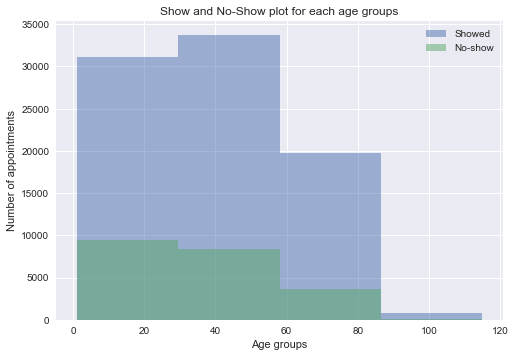

In [28]:
plt.style.use('seaborn')
df.age[showed].hist(alpha=0.5, bins=4, label='Showed')
df.age[noshow].hist(alpha=0.5, bins=4, label='No-show')
plt.title("Show and No-Show plot for each age groups")
plt.xlabel("Age groups")
plt.ylabel("Number of appointments")
plt.legend();

#### Looking at the above histogram, it appears that for the age group <=30, the percentage of no-show is the highest (around 25%) and it gets lower as we move up through the age groups so we can conclude tenatively that older age groups are more likely to show-up for their appointments

In [29]:
# Check No-show status for the six remaining attributes

# attributes = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']

# fig, ax = plt.subplots(2, 3, figsize=(24, 10))
# i = j= 0
# for att in attributes:
#     group_counts = df.groupby(att).no_show.value_counts()
#     group_counts

#     prop__noshow_0 = group_counts[0][1] / group_counts[0].sum()
#     prop__noshow_1 = group_counts[1][1] / group_counts[1].sum()

#     ax[i, j].bar(["0", "1"], [prop__noshow_0, prop__noshow_1])
#     ax[i, j].set_title("Proportion of Patients Not Showing for Appointments")
#     ax[i, j].set_xlabel(att)
#     ax[i, j].set_ylabel("Proportion");

#     if(j==2):
#         i=1
#         j=0
#     else:
#         j+=1

### 4.4 Does scholarship (social welfare membership status) affect patient no-show?

#### Lets check show/no-show for patients with scholarship and those who don't

In [30]:
df.groupby(['scholarship', 'no_show']).size()

scholarship  no_show
0            0          77069
             1          19109
1            0           8238
             1           2571
dtype: int64

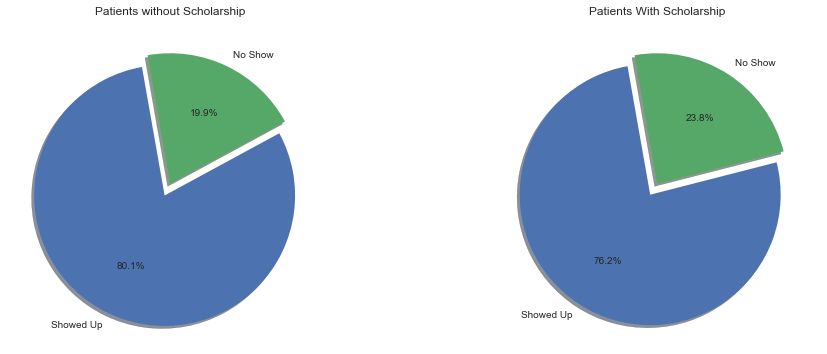

In [31]:
plt.style.use('seaborn')
labels = ['Showed Up', 'No Show']

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
df.groupby(['scholarship', 'no_show']).size()[0].plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=100, explode=(0.1, 0), labels=labels, title="Patients without Scholarship", ylabel = "", ax=ax[0])
df.groupby(['scholarship', 'no_show']).size()[1].plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=100, explode=(0.1, 0), labels=labels, title="Patients With Scholarship", ylabel = "", ax=ax[1]);

#### From the above pie charts, it looks like higher proportion of patients miss their appointments if they are in the Scholarhip program (23.8%) verus not enrolled in the program (19.9%).

### 4.5. Are handicapped patients more likey to miss their appointments?

#### Plot the mean of no-show for each type of handicap

In [32]:
df.groupby('handcap').no_show.mean() #check the handicap attribute against no-show

handcap
0    0.203089
1    0.179324
2    0.202186
3    0.230769
4    0.333333
Name: no_show, dtype: float64

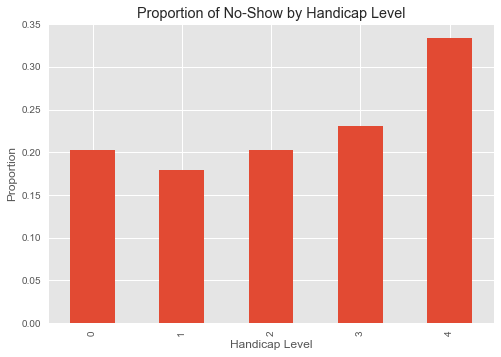

In [33]:
# let's see it on a chart for better illustration
plt.style.use('ggplot')
df.groupby('handcap').no_show.mean().plot(kind='bar', ylabel='Proportion', xlabel='Handicap Level', title="Proportion of No-Show by Handicap Level");

#### From the above bar chart, it looks like higher the handicap score of the patient, the more likely they are to miss their appointment and not show-up

### 4.6. Are there more no-show on certain days of the week?
#### Lets plot the mean no-show for each day of the week

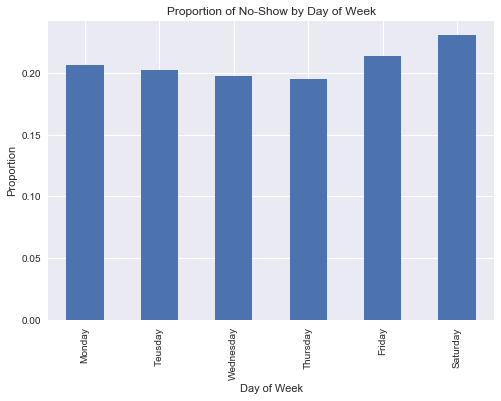

In [34]:
group_counts = df.groupby(['appointment_day_of_week']).no_show.mean()
plt.style.use('seaborn')
ax = group_counts.plot(kind='bar', ylabel='Proportion', xlabel='Day of Week', title="Proportion of No-Show by Day of Week")
ax.set_xticklabels(['Monday', 'Teusday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);

#### From the above bar chart, it looks like there are more no-shows on Fridays and Saturdays than on the rest of the weekdays

### 4.7. If a patient recevies a reminder SMS, is she/he more likely to attend the apointment?
#### Again we check mean no-show for each group

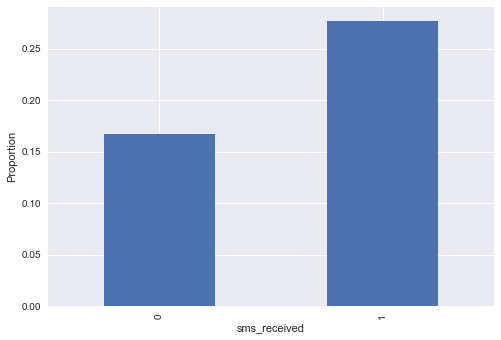

In [35]:
group_counts = df.groupby(['sms_received']).no_show.mean()
group_counts.plot(kind='bar', ylabel='Proportion');

#### The above car chart shows more patients miss their appointments when they are sent SMS reminder. That looks counter intuitive. More data is required understand this more.

### 4.8. Does alochol problems affect patient attendance of their appointments?

#### Lts examine mean no-show vs for aggregate alcoholism attribute and break it down per gender as well  

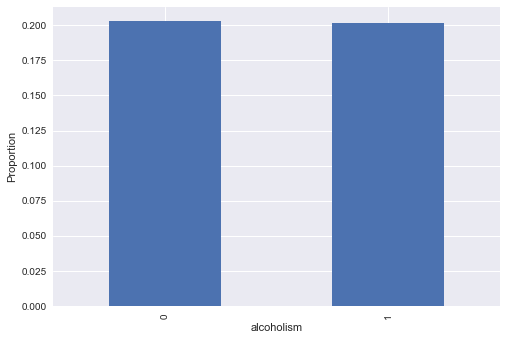

In [36]:
group_counts = df.groupby(['alcoholism']).no_show.mean()
group_counts.plot(kind='bar', ylabel='Proportion');

In [51]:
group_counts = df.groupby(['alcoholism', 'gender']).no_show.mean()
group_counts

alcoholism  gender
0           F         0.202729
            M         0.202580
1           F         0.251840
            M         0.172672
Name: no_show, dtype: float64

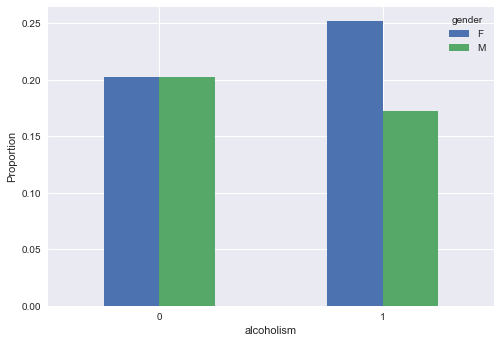

In [54]:
group_counts.unstack().plot(kind='bar', ylabel='Proportion', rot=0);

#### From the above bar charts we can see that although on aggregates alcohol issues do not appear to affect no-show, we can see by separting the groups by gender that 25% of females with alcohol issues miss their appointments while only 17% of men with alcohlol issues miss their appointments

### 4.9. Do patients with chronic diseases (diabetes and hypertension) tend to miss appointments more or less than other patients?

#### First, we check for patients with hypertension

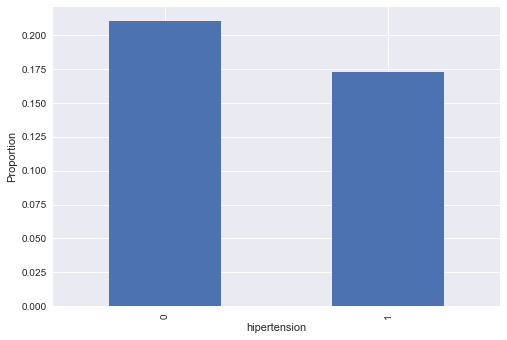

In [39]:
group_counts = df.groupby(['hipertension']).no_show.mean()
group_counts.plot(kind='bar', ylabel='Proportion');

#### Then for those with diabetes

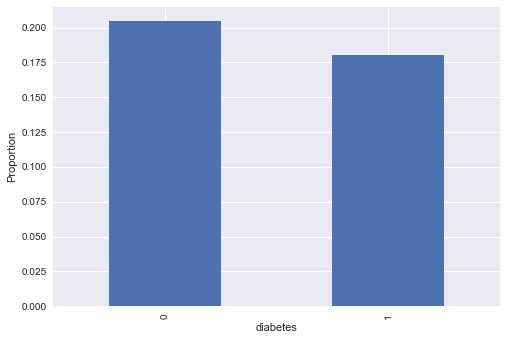

In [40]:
group_counts = df.groupby(['diabetes']).no_show.mean()
group_counts.plot(kind='bar', ylabel='Proportion');

#### From the above bar charts we can see that patients with chronic diseases tend to miss their appointments less than other patients although the percentages are close.

###  4.10. Which neighbourhoods have higher no-show proportions? and which have the lowest?

In [41]:
group_counts = df.groupby(['neighbourhood']).no_show.mean()
group_counts.sort_values(ascending=False)

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.291433
SANTA CECÍLIA                  0.270880
SANTA CLARA                    0.266129
ITARARÉ                        0.263189
                                 ...   
SOLON BORGES                   0.148230
MÁRIO CYPRESTE                 0.144414
AEROPORTO                      0.125000
ILHA DO BOI                    0.085714
PARQUE INDUSTRIAL              0.000000
Name: no_show, Length: 81, dtype: float64

#### It looks like one neighbourhood have all patients not showing (ILHAS OCEÂNICAS DE TRINDADE) while another (PARQUE INDUSTRIAL) have all patients showing. Lets check why.

In [42]:
df.query('neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE"') # this neighbourhood have only two patients reported and both did not show up so it is not indicative

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_day_of_week,lead_days
48754,5.349869e+11,5583947,F,2016-04-14 12:25:43+00:00,2016-05-13 00:00:00+00:00,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,4,29
48765,7.256430e+12,5583948,F,2016-04-14 12:26:13+00:00,2016-05-13 00:00:00+00:00,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,4,29


In [43]:
df.query('neighbourhood == "PARQUE INDUSTRIAL"') # this neighbourhood have only two patients reported and both did not show up so it is not indicative

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_day_of_week,lead_days
75199,8.255992e+12,5663947,F,2016-05-05 10:48:59+00:00,2016-05-05 00:00:00+00:00,17,PARQUE INDUSTRIAL,0,0,0,0,0,0,0,3,0


#### Display the top 10 neighboorhoods in terms of no-show 

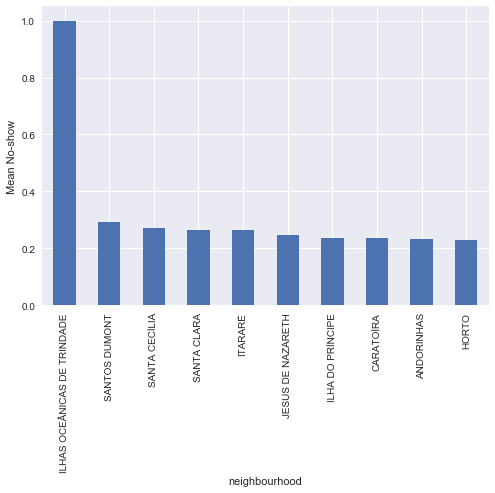

In [44]:
group_counts.sort_values(ascending=False)[:10].plot(kind='bar', ylabel='Mean No-show');

#### Display the 10 neighbourhoods with lowest no-show rate

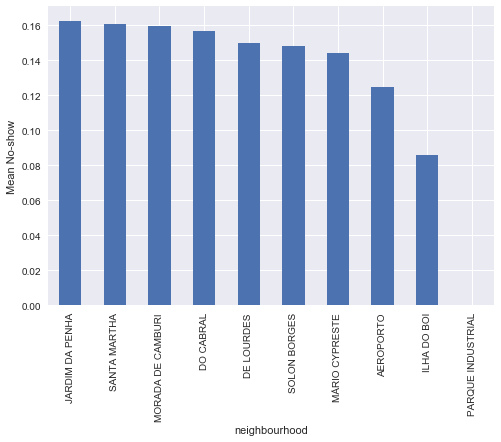

In [45]:
group_counts.sort_values(ascending=False)[-10:].plot(kind='bar', ylabel='Mean No-show');

#### From the above bar charts we can see that no-show differs from one neighbourhood to another. After excludiing the two outliers, we can see that the heighest no-show neighbourhood is SANTOS DUMONT with around 29% no-show while the neighbourhood with lowest no-show is ILHA DO BOI with no-show of around 8%

### 4.6 Same day appointments vs No-show

In [46]:
df.groupby('lead_days')['no_show'].mean()

lead_days
-6      1.000000
-1      1.000000
 0      0.046859
 1      0.213803
 2      0.238698
          ...   
 155    0.600000
 162    0.181818
 169    0.125000
 176    0.375000
 179    0.200000
Name: no_show, Length: 131, dtype: float64

<a id='conclusions'></a>
## 5. Conclusions

### - Results: Our analysis revealed the following tentative findings:

- The proportion of female patiends who missed their appointments is approximately equal to the proportion of male patients who did not show up.
- Patients in older age groups tends to miss their appointments less than patients in younger groups.
- Patients enrolled in the scholarship welfare program miss their appointments more than patients who are not enrolled in the scholarship program.
- Handicapped patients tend to miss their appointments more than not Handicapped patients.
- There are more no-shows on Fridays and Saturdays than the rest of the weekdays.
- On average, patients who receive SMS reminder miss heir appointments more than patients who did not get an SMS reminder.
- Female patients with alcoholism probllem tend to miss their appointments more than male patients with the same problem.
- Patients with chronic diseases like diabetes and hypertension are more punctual and miss their appointments less than pat without chronic diseases.
- No-show differs from one neighbourhood to another. After excludiing the two outliers, we can see that the heighest no-show neighbourhood is SANTOS DUMONT with around 29% no-show while the neighbourhood with lowest no-show is ILHA DO BOI with no-show of around 8%.

### - Limitations: Our data has the following constraints:

-  The results are obtained using descriptive statistics and not inferential statistics, meaning we did not test any hypotheses or conduct controlled experiments or inferences from the data.
- For the SMS_ received, the analysis shows more patients miss their appointments when they are sent SMS reminder. That looks counter intuitive. Additional information like date/time of SMS reminder is required understand this more.
- Our data is mostly categorical so we could not use correlations to find relationships between variables. 

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!